In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [56]:
LIKES_P = 0.08768846333333331
RETWEETS_P = 0.2729767066666667
REPLIES_P = 0.6393448333333334

def get_points(filename, filename_followers, encoding):
    df_followers = pd.read_csv(filename_followers, encoding=encoding)
    follower_dic = {}
    for data in df_followers.iterrows():
        if data[1]["thread_number"] not in follower_dic.keys():
            follower_dic[data[1]["thread_number"]] = data[1]["number_of_followers"]

    df = pd.read_csv(filename, encoding=encoding)
    df = df.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'])
    grouped_df = df.groupby("thread_number")
    group_sizes = grouped_df.size()
    df_engage = grouped_df[["retweets","likes","replies"]].sum()
    df_engage["thread_length"] = group_sizes

    avg_x = []
    avg_e = []
    for data in df_engage.iterrows():
        thread_length = data[1]["thread_length"]
        ahp = (data[1]["retweets"]*RETWEETS_P + data[1]["likes"]*LIKES_P + data[1]["replies"]*REPLIES_P)*1.0/thread_length
        # if follower_dic[data[0]] == 0:
        #     continue
        # ahp /= follower_dic[data[0]]
        # print(follower_dic[data[0]], data[0])
        avg_x.append(thread_length)
        avg_e.append(ahp)

    total_x = []
    total_e = []
    for data in df_engage.iterrows():
        thread_length = data[1]["thread_length"]
        ahp = (data[1]["retweets"]*RETWEETS_P + data[1]["likes"]*LIKES_P + data[1]["replies"]*REPLIES_P)
        # if follower_dic[data[0]] == 0:
        #     continue
        # ahp /= follower_dic[data[0]]
        total_x.append(thread_length)
        total_e.append(ahp)
    
    # avg_e1 = [np.log10(i) for i in avg_e]
    # total_e1 = [np.log10(i) for i in total_e]
    
    return avg_x, avg_e, total_x, total_e

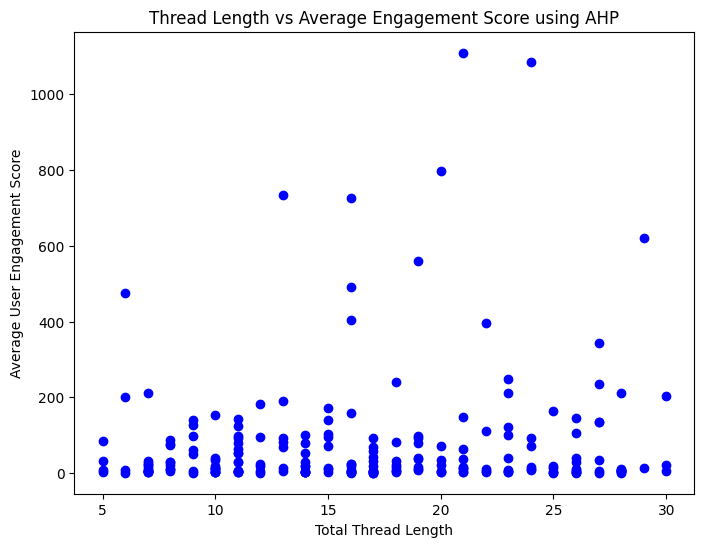

In [63]:
avg_x1, avg_e1, total_x1, total_e1 = get_points("./data/full_text_data/five_ten_url_full_text.csv", "./data/five_ten.csv", "ISO-8859-1")
avg_x2, avg_e2, total_x2, total_e2 = get_points("./data/full_text_data/ten_fifteen_url_full_text.csv", "./data/ten_fifteen.csv", "ISO-8859-1")
avg_x3, avg_e3, total_x3, total_e3 = get_points("./data/full_text_data/fifteen_twenty_url_full_text.csv", "./data/fifteen_twenty.csv", "ISO-8859-1")
avg_x4, avg_e4, total_x4, total_e4 = get_points("./data/full_text_data/twenty_twentyfive_url_full_text.csv", "./data/twenty_twentyfive.csv", "ISO-8859-1")
avg_x5, avg_e5, total_x5, total_e5 = get_points("./data/full_text_data/twentyfive_thirty_url_full_text.csv", "./data/twentyfive_thirty.csv", "ISO-8859-1")

avg_x = avg_x1 + avg_x2 + avg_x3 + avg_x4 + avg_x5
avg_e = avg_e1 + avg_e2 + avg_e3 + avg_e4 + avg_e5
total_x = total_x1 + total_x2 + total_x3 + total_x4 + total_x5
total_e = total_e1 + total_e2 + total_e3 + total_e4 + total_e5

plt.figure(figsize=(8, 6))
plt.scatter(avg_x, avg_e, color='blue', label='Data Points')
plt.title("Thread Length vs Average Engagement Score using AHP")
plt.xlabel("Total Thread Length")
plt.ylabel("Average User Engagement Score")
# plt.grid(True)
plt.show()

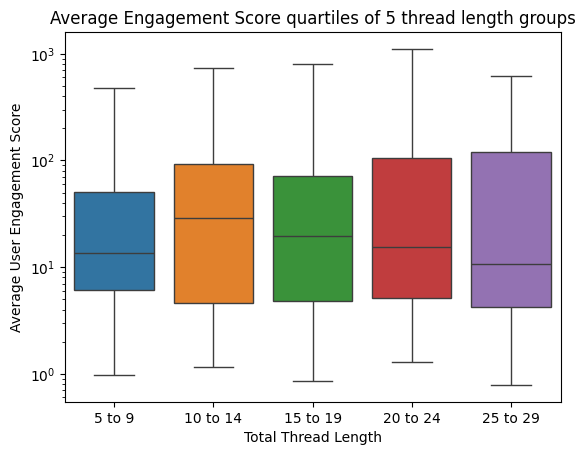

In [66]:
data = {
    "5 to 9": avg_e1,
    "10 to 14": avg_e2,
    "15 to 19": avg_e3,
    "20 to 24": avg_e4,
    "25 to 29": avg_e5,
}
fig, ax = plt.subplots()
sns.boxplot(data=list(data.values()), ax=ax, log_scale=10)
ax.set_xticks([0, 1, 2, 3, 4])
ax.set_xticklabels(data.keys())
ax.set_title("Average Engagement Score quartiles of 5 thread length groups")
plt.xlabel("Total Thread Length")
plt.ylabel("Average User Engagement Score")
plt.show()

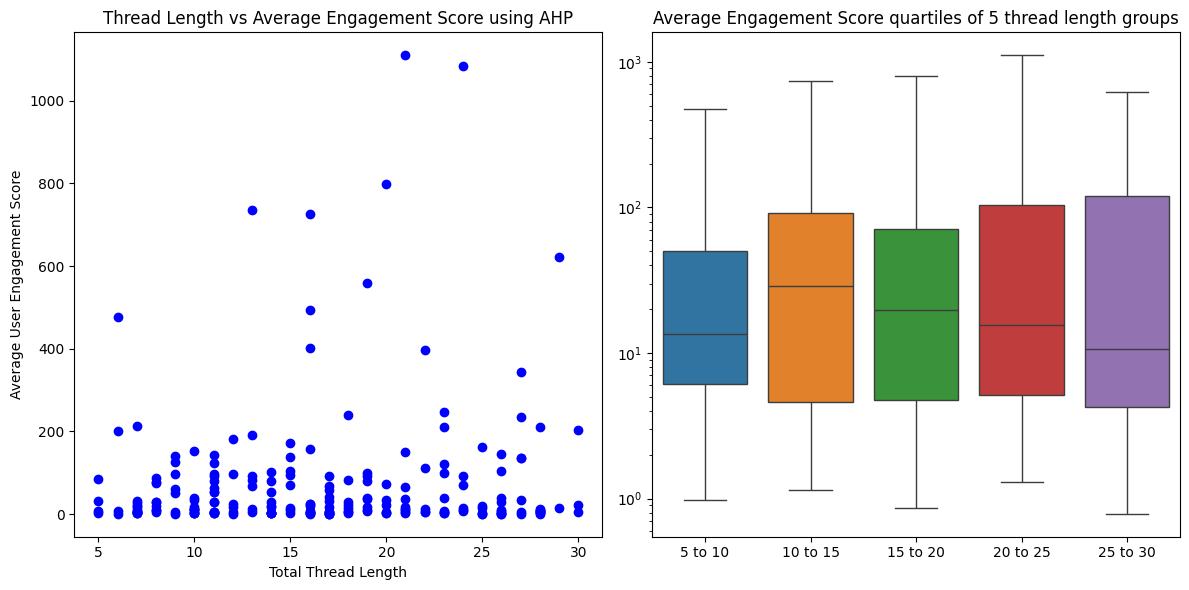

In [64]:
avg_x = avg_x1 + avg_x2 + avg_x3 + avg_x4 + avg_x5
avg_e = avg_e1 + avg_e2 + avg_e3 + avg_e4 + avg_e5
total_x = total_x1 + total_x2 + total_x3 + total_x4 + total_x5
total_e = total_e1 + total_e2 + total_e3 + total_e4 + total_e5

# Data for the box plot
data = {
    "5 to 10": avg_e1,
    "10 to 15": avg_e2,
    "15 to 20": avg_e3,
    "20 to 25": avg_e4,
    "25 to 30": avg_e5,
}

# Create a figure with two subplots (1 row, 2 columns)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Scatter plot in the first subplot
ax1.scatter(avg_x, avg_e, color='blue', label='Data Points')
ax1.set_title("Thread Length vs Average Engagement Score using AHP")
ax1.set_xlabel("Total Thread Length")
ax1.set_ylabel("Average User Engagement Score")

# Box plot in the second subplot
sns.boxplot(data=list(data.values()), ax=ax2, log_scale=10)
ax2.set_xticks([0, 1, 2, 3, 4])
ax2.set_xticklabels(data.keys())
ax2.set_title("Average Engagement Score quartiles of 5 thread length groups")

# Adjust the layout for better spacing
plt.tight_layout()

# Display the combined plots
plt.show()

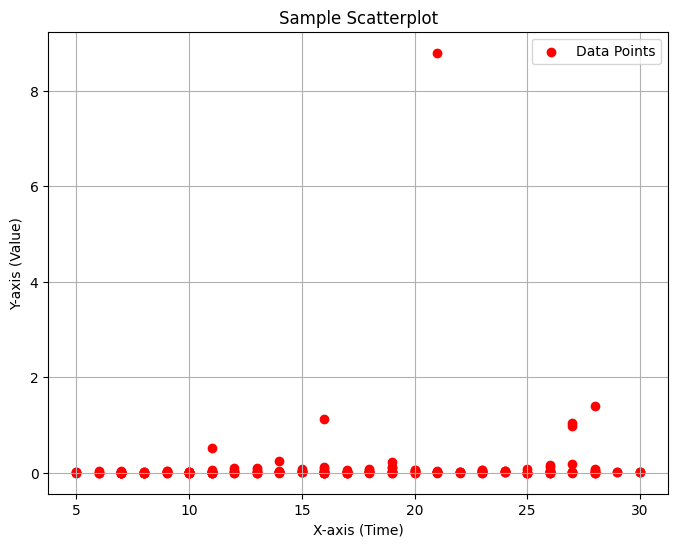

In [29]:
plt.figure(figsize=(8, 6))
plt.scatter(total_x, total_e, color='red', label='Data Points')  # Scatter plot with custom color, marker, and size

# Customize plot
plt.title("Sample Scatterplot")  # Title of the plot
plt.xlabel("X-axis (Time)")  # Label for the x-axis
plt.ylabel("Y-axis (Value)")  # Label for the y-axis
plt.grid(True)  # Add grid lines
plt.legend()  # Display the legend
plt.show()  # Display the scatterplot

In [51]:
df = pd.read_csv("./data/full_text_data/five_ten_url_full_text.csv", encoding="ISO-8859-1")
df = df.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'])

In [9]:
df_followers = pd.read_csv("./data/five_ten.csv", encoding="ISO-8859-1")
df_followers.head()

,id,thread_number,timestamp,text,retweets,likes,replies,number_of_followers
0,999307110902050818,Thread 1,1527088356,Extraordinary evidence at Treasury committee f...,66,59,5,173199
1,999307395712143360,Thread 1,1527088424,The Brexiter favourite Max Fac - would cost bu...,83,107,10,173199
2,999307826265812992,Thread 1,1527088526,How does he arrive at the figure\r\r\n\r\r\n20...,6,11,2,173199
3,999308153346052102,Thread 1,1527088604,Theresa May's New Customs Partnership is much ...,7,10,1,173199
4,999308653894230022,Thread 1,1527088724,Mr Thompson said he did not expect the EU to r...,17,12,2,173199


In [19]:
like_p = 0.08768846333333331
retweets_p = 0.2729767066666667
replies_p = 0.6393448333333334

grouped_df = df.groupby("thread_number")
group_sizes = grouped_df.size()
df_engage = grouped_df[["retweets","likes","replies"]].sum()
df_engage["thread_length"] = group_sizes
df_engage.head()
for data in df_engage.iterrows():
    print(data[0])

# avg_x = []
# avg_e = []
# for data in df_engage.iterrows():
#     thread_length = data[1]["thread_length"]
#     ahp = (data[1]["retweets"]*retweets_p + data[1]["likes"]*like_p + data[1]["replies"]*replies_p)*1.0/thread_length
#     avg_x.append(thread_length)
#     avg_e.append(ahp)
# # print(avg_e)
# # print(avg_x)
# # largest_value = max(avg_e)

# # # Find the index of the largest value
# # index_of_largest = avg_e.index(largest_value)
# # print(index_of_largest)
# # df_engage.head(35)

# total_x = []
# total_e = []
# for data in df_engage.iterrows():
#     thread_length = data[1]["thread_length"]
#     ahp = (data[1]["retweets"]*retweets_p + data[1]["likes"]*like_p + data[1]["replies"]*replies_p)
#     total_x.append(thread_length)
#     total_e.append(ahp)

Thread 1
Thread 10
Thread 100
Thread 101
Thread 11
Thread 12
Thread 13
Thread 14
Thread 15
Thread 16
Thread 17
Thread 18
Thread 19
Thread 2
Thread 20
Thread 21
Thread 22
Thread 23
Thread 24
Thread 25
Thread 26
Thread 27
Thread 28
Thread 29
Thread 3
Thread 30
Thread 31
Thread 32
Thread 33
Thread 34
Thread 35
Thread 36
Thread 37
Thread 38
Thread 39
Thread 4
Thread 40
Thread 41
Thread 42
Thread 43
Thread 44
Thread 45
Thread 46
Thread 47
Thread 48
Thread 49
Thread 5
Thread 50
Thread 51
Thread 52
Thread 53
Thread 54
Thread 55
Thread 56
Thread 57
Thread 58
Thread 59
Thread 6
Thread 60
Thread 61
Thread 62
Thread 63
Thread 64
Thread 65
Thread 66
Thread 67
Thread 68
Thread 69
Thread 7
Thread 70
Thread 71
Thread 72
Thread 73
Thread 74
Thread 75
Thread 76
Thread 77
Thread 78
Thread 79
Thread 8
Thread 80
Thread 81
Thread 82
Thread 83
Thread 84
Thread 85
Thread 86
Thread 87
Thread 88
Thread 89
Thread 9
Thread 90
Thread 91
Thread 92
Thread 93
Thread 94
Thread 95
Thread 96
Thread 97
Thread 98
Thread 

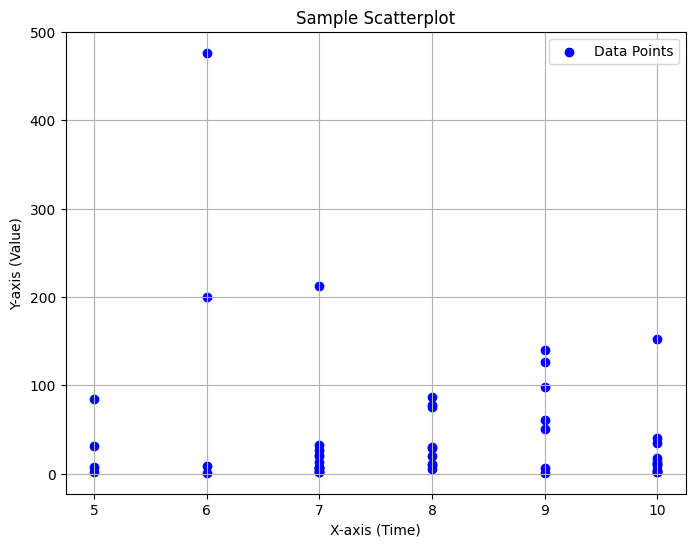

In [48]:
plt.figure(figsize=(8, 6))
plt.scatter(avg_x, avg_e, color='blue', label='Data Points')  # Scatter plot with custom color, marker, and size

# Customize plot
plt.title("Sample Scatterplot")  # Title of the plot
plt.xlabel("X-axis (Time)")  # Label for the x-axis
plt.ylabel("Y-axis (Value)")  # Label for the y-axis
plt.grid(True)  # Add grid lines
plt.legend()  # Display the legend
plt.show()  # Display the scatterplot

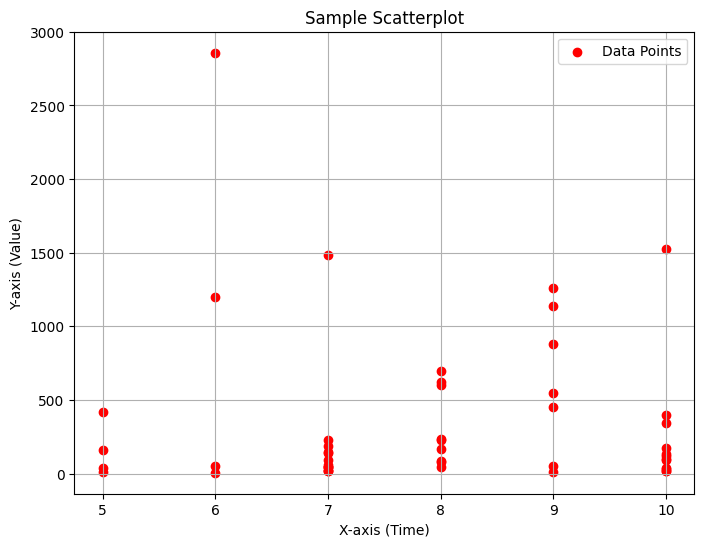

In [50]:
plt.figure(figsize=(8, 6))
plt.scatter(total_x, total_e, color='red', label='Data Points')  # Scatter plot with custom color, marker, and size

# Customize plot
plt.title("Sample Scatterplot")  # Title of the plot
plt.xlabel("X-axis (Time)")  # Label for the x-axis
plt.ylabel("Y-axis (Value)")  # Label for the y-axis
plt.grid(True)  # Add grid lines
plt.legend()  # Display the legend
plt.show()  # Display the scatterplot

In [15]:
df = pd.read_csv("./data/five_ten.csv", encoding="ISO-8859-1")
df.head()

# for data in df.iterrows():
#     thread_number = data[1]["thread_number"]
#     followers = data[1]["thread_number"]
#     print(followers)

follower_dic = {}
for data in df.iterrows():
    if data[1]["thread_number"] not in follower_dic.keys():
        follower_dic[data[1]["thread_number"]] = data[1]["number_of_followers"]

print(follower_dic)

{'Thread 1': 173199, 'Thread 2': 92650, 'Thread 3': 889461, 'Thread 4': 0, 'Thread 5': 31975, 'Thread 6': 0, 'Thread 7': 0, 'Thread 8': 0, 'Thread 9': 0, 'Thread 10': 21195, 'Thread 11': 0, 'Thread 12': 368196, 'Thread 13': 0, 'Thread 14': 30410, 'Thread 15': 0, 'Thread 16': 0, 'Thread 17': 89078, 'Thread 18': 5095, 'Thread 19': 21457, 'Thread 20': 2682, 'Thread 21': 3651, 'Thread 22': 10904, 'Thread 23': 0, 'Thread 24': 0, 'Thread 25': 0, 'Thread 26': 8093, 'Thread 27': 73795, 'Thread 28': 91839, 'Thread 29': 70566, 'Thread 30': 3911, 'Thread 31': 0, 'Thread 32': 33831, 'Thread 33': 0, 'Thread 34': 0, 'Thread 35': 0, 'Thread 36': 119789, 'Thread 37': 11040, 'Thread 38': 59664, 'Thread 39': 0, 'Thread 40': 0, 'Thread 41': 262493, 'Thread 42': 91844, 'Thread 43': 1635, 'Thread 44': 0, 'Thread 45': 0, 'Thread 46': 8992, 'Thread 47': 6657, 'Thread 48': 0, 'Thread 49': 0, 'Thread 50': 0, 'Thread 51': 65495, 'Thread 52': 7382, 'Thread 53': 0, 'Thread 54': 91844, 'Thread 55': 0, 'Thread 56':